<a href="https://colab.research.google.com/github/RyanbwChien/Fraud_data_LLM_BertModel/blob/main/Fraud_Case_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install scikit-learn
%pip install pymysql
%pip install python-dotenv
%pip install scikit-learn
%pip install miceforest
!apt-get update -y
!apt-get install -y fonts-noto-cjk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 1.4 MB/s eta 0:00:00
Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,235 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [3,755 kB]
Hit:11 https://ppa.launchpadcontent.net/ubun

In [2]:
import json
import pandas as pd
import os
import dotenv
import pymysql
import numpy as np
import matplotlib.pyplot as plt


In [3]:
dotenv.load_dotenv("/content/drive/MyDrive/.env")

True

In [4]:
os.getenv('DB_HOST')

'35.201.141.125'

In [154]:
# GCP SQL database connection
db_config = {
    "database": "Anti_Fraud",
    "charset": "utf8mb4",
    "host": os.getenv('DB_HOST', 'localhost'),
    "user": os.getenv('DB_USER', 'root'),
    "password": os.getenv('DB_PASSWORD', 'password')

}

In [155]:
conn = pymysql.connect(**db_config)
cursor = conn.cursor()
query = """SELECT F1.*, t1.Fraud_type FROM Fraud_case F1
                      join (SELECT F2.*,F3.Fraud_type FROM Fraud_classification F2
                          join Fraud_type F3 on F2.Fraud_type_ID = F3.Fraud_type_ID) as t1
                          on  F1.Case_ID = t1.Case_ID
      """
cursor.execute(query)
result = cursor.fetchall()
columns = [col[0] for col in cursor.description]

In [174]:
Fraud_data = pd.DataFrame(result,columns=columns)
Fraud_data = Fraud_data.replace({None: np.nan})
Fraud_data = Fraud_data.loc[~(Fraud_data["Victim_Age"]>2000),:]
len(Fraud_data)
# Fraud_data.to_csv("Fraud_data.csv",encoding='utf-8-sig')

44038

In [175]:
analy_col = ['Area', 'Platform', 'Victim_Gender', 'Victim_Age', 'Victim_Career','Financial_Loss', "Fraud_type"]
Fraud_data[analy_col]

,Area,Platform,Victim_Gender,Victim_Age,Victim_Career,Financial_Loss,Fraud_type
0,新北市,社群軟體,NaN,NaN,NaN,5060.0,假投資
1,臺中市,社群軟體,NaN,NaN,NaN,NaN,假投資
2,高雄市,社群軟體,F,67.0,其他,1200000.0,假投資
3,臺灣,社群軟體,NaN,NaN,NaN,NaN,假投資
4,新北市,社群軟體,NaN,NaN,NaN,135000.0,假投資
...,...,...,...,...,...,...,...
44035,臺北市,社群軟體,F,NaN,公務員,154999.0,繳費詐騙
44036,臺中市,社群軟體,NaN,NaN,NaN,100000.0,繳費詐騙
44037,雲林縣,社群軟體,NaN,NaN,NaN,45005.0,繳費詐騙
44038,桃園市,社群軟體,NaN,NaN,NaN,14016.0,繳費詐騙


In [176]:
Fraud_data_dtype_T = Fraud_data.dtypes.reset_index()
Fraud_data_dtype_T
# Fraud_data.to_csv("Fraud_data.csv",encoding='utf-8-sig')

,index,0
0,Case_ID,object
1,Title,object
2,Reported_Date,object
3,Area,object
4,Platform,object
5,Victim_Gender,object
6,Victim_Age,float64
7,Victim_Career,object
8,Financial_Loss,float64
9,Url,object


In [ ]:
# Fraud_data = pd.read_json(r"/content/drive/MyDrive/Fraud_case.json")

In [177]:
col_na_count = Fraud_data.apply(lambda x: sum(pd.isna(x)),axis=0)
col_na_count

,0
Case_ID,0
Title,0
Reported_Date,3
Area,5645
Platform,5016
Victim_Gender,32034
Victim_Age,35444
Victim_Career,33208
Financial_Loss,15026
Url,0


In [178]:
analy_col = ['Area', 'Platform', 'Victim_Gender', 'Victim_Age', 'Victim_Career','Financial_Loss', "Fraud_type"]
print(analy_col)

['Area', 'Platform', 'Victim_Gender', 'Victim_Age', 'Victim_Career', 'Financial_Loss', 'Fraud_type']


In [179]:
#計算NA欄位數量
row_na_count = Fraud_data.apply(lambda x: sum(pd.isna(x)),axis=1)
#移除當資料列缺值數占分析欄位比例 30%時移除該列(2/7 約 30%)
Sub_Fraud_data = Fraud_data.loc[row_na_count<=2, analy_col].reset_index(drop=True)
Sub_col_na_count = Sub_Fraud_data.apply(lambda x: sum(pd.isna(x)), axis=0).reset_index()
Sub_col_na_count
print("移除缺失值資料量:",len(Sub_Fraud_data))

移除缺失值資料量: 11752


In [180]:
Sub_col_na_count

,index,0
0,Area,154
1,Platform,543
2,Victim_Gender,1275
3,Victim_Age,3396
4,Victim_Career,1802
5,Financial_Loss,522
6,Fraud_type,0


In [181]:
Sub_Fraud_data["Victim_Age"].value_counts().sort_index().reset_index()

,Victim_Age,count
0,0.0,1816
1,1.0,3
2,2.0,2
3,6.0,1
4,8.0,2
...,...,...
88,95.0,1
89,102.0,1
90,111.0,1
91,113.0,6


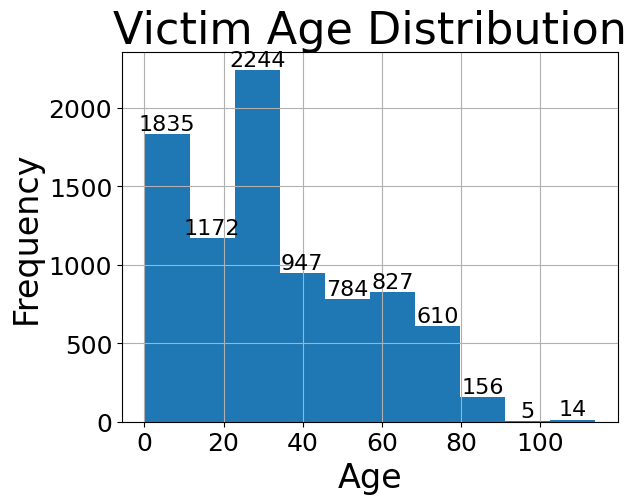

In [182]:
ax = Fraud_data["Victim_Age"].hist()
plt.title("Victim Age Distribution",fontsize=32)  # 設定標題
plt.xlabel("Age",fontsize=24)  # 設定 X 軸標籤
plt.ylabel("Frequency",fontsize=24)  # 設定 Y 軸標籤
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# 在每個柱子上標示數值
for p in ax.patches:
    plt.text(p.get_x() + p.get_width() / 2,  # X 位置：柱子中間
             p.get_height(),  # Y 位置：柱子高度
             int(p.get_height()),  # 標示的數字
             ha='center', va='bottom', fontsize=16, color='black')  # 文字位置與樣式
plt.show()  # 顯示圖表

In [183]:
Age_outlier = (Sub_Fraud_data["Victim_Age"]<10) | (Sub_Fraud_data["Victim_Age"]>110)
print( "Age outlier count:", sum(Age_outlier))

Age outlier count: 1838


In [184]:
Sub_Fraud_data = Sub_Fraud_data[~Age_outlier]

In [185]:
len(Sub_Fraud_data)

9914

In [186]:
Sub_Fraud_data = Sub_Fraud_data.fillna(np.nan)

In [187]:
Sub_Fraud_data["Area"].value_counts()

,count
Area,
臺北市,2960
新北市,1179
臺中市,1100
臺灣,725
高雄市,720
桃園市,685
臺南市,502
彰化縣,385
屏東縣,220


In [114]:
Sub_Fraud_data["Area"] = Sub_Fraud_data["Area"].apply(lambda x: "臺"+x[1:] if
                            ((isinstance(x,str)) and x[0] == "台" ) else x)
remove_Area_category = Sub_Fraud_data["Area"].apply(lambda x: True if isinstance(x,str)
                            and (x[0]!="上" and x[0]!="重") and
                            (x.startswith("臺") or x.endswith("市") or x.endswith("縣"))
                            else False)
Sub_Fraud_data = Sub_Fraud_data[remove_Area_category]
Sub_Fraud_data["Area"].value_counts()

,count
Area,
臺北市,3292
新北市,1372
臺中市,1293
臺灣,1079
高雄市,859
桃園市,777
臺南市,606
彰化縣,476
屏東縣,261


In [86]:
len(Sub_Fraud_data)

11535

In [115]:
replace_item = {'網拍':'網購',	"y拍" :'網購','拍賣網站':'網購',"網路博弈":'網路','網路平台':'網路',
'面對面':'面交',"當面": '面交',"臨櫃":'銀行','網路交友':'交友軟體','網路廣告':'網路','求職網站':'假求職',"臉書": "社群軟體","社交平台": "社群軟體",
"路邊借錢" :'面交',"街頭接觸":'街頭',"街頭搭訕":'街頭',"網路社群":"社群軟體","蝦皮": "網購","路邊推銷":'街頭',"路邊":'街頭',"路邊算命":"街頭","路邊兜售":"街頭",
"露天拍賣":'街頭',"超商貨到付款":'網購',"網路求職": "假求職","網站平台":'網路',"網際網路":'網路',
"短影音平台":'網路',"存款機":"ATM","釣魚簡訊":"簡訊","蝦皮購物平台" :"網購","網站":"網路",
 "電郵":"電子郵件", "網路聊天室":'網路', "網路轉帳":'網路',"釣魚簡訊":"簡訊", "虛擬貨幣":"虛擬貨幣平台"
 }
Sub_Fraud_data['Platform'] = Sub_Fraud_data['Platform'].apply(lambda x: replace_item[x] if x in replace_item.keys() else x)

In [116]:
Platform_category = Sub_Fraud_data['Platform'].value_counts().reset_index()
remove_Platform_category = Platform_category["Platform"][Platform_category["count"]<3].tolist()
remove_Platform_category
Sub_Fraud_data['Platform'] = Sub_Fraud_data['Platform'].apply(lambda x: "其他" if x in remove_Platform_category else x)
Sub_Fraud_data['Platform'].value_counts()

,count
Platform,
社群軟體,3336
電話,3216
通訊軟體,2383
交友軟體,782
連結,680
網路,151
LINE,96
網購,87
其他,72


In [117]:
career_mapping_reduced = {
'其他': '其他', '學生': '學生','無業/待業中': '無業','自營商/創業者':'自營商','退休人士': '退休','服務業': '服務業','家庭主婦/主夫': '家庭主婦','工程師': '工程師','業務/銷售': '業務','公務員': '公務員','金融從業人員': '金融業','醫療人員': '醫療','教師': '教育','技術人員': '技術工','藝術/娛樂業': '娛樂/藝術',
'藝人': '娛樂/藝術','護理人員': '醫療','計程車司機': '司機','行政助理': '行政','警察': '警察','工人': '工人','會計師': '會計','律師': '法律','政治人物': '政治人物','保全': '保全','店員': '零售','舞蹈老師': '教育',
'記者': '媒體','志工': '志工','餐廳業者': '餐飲業','護士': '醫療','軍人': '軍人','賣家': '自營商','電子業': '科技業','軍官': '軍人','保全員': '保全','法律從業人員': '法律','銀行員工': '金融業','待業中': '無業','退伍軍人': '軍人',
'平面設計師': '設計/藝術','運動員': '運動員','行政人員': '行政','銀髮長輩': '退休','貿易公司老闆': '自營商','司機': '司機','設計師': '設計/藝術','檢察官': '法律','模特': '娛樂/藝術','工讀生': '學生','工地工人': '工人','警務人員': '警察','導演': '娛樂/藝術',
'清潔工': '服務業','社會工作者': '社會工作者','外送員': '外送服務','資訊專業人員': '科技業','會計人員': '會計','科技從業人員': '科技業','翻譯': '翻譯/語言','保全人員': '保全','資訊及通訊專業人員': '科技業','上班族': '上班族','打雜上班族': '上班族','網路直播主': '網紅','室內設計師': '設計/藝術','運將': '司機','自由接案寫手': '自由職業者','系統管理員': '科技業'
}

Sub_Fraud_data['Victim_Career'] = Sub_Fraud_data['Victim_Career'].map(career_mapping_reduced)

In [118]:
Career_group = Sub_Fraud_data['Victim_Career'].value_counts().reset_index()
Career_group

remove_Career_category = Career_group["Victim_Career"][Career_group["count"]<3].tolist()

Sub_Fraud_data['Victim_Career'] = Sub_Fraud_data['Victim_Career'].apply(lambda x: "其他" if x in remove_Career_category else x)
Sub_Fraud_data['Victim_Career'].value_counts()

,count
Victim_Career,
其他,4277
學生,1413
無業,991
退休,707
自營商,630
家庭主婦,402
服務業,328
業務,155
公務員,142


In [119]:
category_col = Sub_Fraud_data.select_dtypes(include=["category","object"]).columns
conti_col = Sub_Fraud_data.select_dtypes(include=['int64', 'float64']).columns
conti_col
# # 法二
# category_col = []
# for i in range(len(Sub_Fraud_data.columns)):
#   if Sub_Fraud_data.dtypes.reset_index().loc[i,0] == "object":
#     category_col.append(Sub_Fraud_data.dtypes.reset_index().loc[i,"index"])
# Sub_Fraud_data.dtypes

Index(['Victim_Age', 'Financial_Loss'], dtype='object')

In [121]:
for cat_col in category_col:
  Sub_Fraud_data[cat_col] = Sub_Fraud_data[cat_col].astype("category")

for cat_col in ["Financial_Loss","Victim_Age"]:
  Sub_Fraud_data[cat_col] = Sub_Fraud_data[cat_col].astype("float")

In [122]:
Sub_Fraud_data.to_csv("Sub_Fraud_data.csv",encoding='utf-8-sig')

In [ ]:
# ordinal_encoder = OrdinalEncoder()
# ordinal_encoder.fit(Sub_Fraud_data[category_col])
# Sub_Fraud_data_category = ordinal_encoder.transform(Sub_Fraud_data[category_col])
# dict(enumerate(ordinal_encoder.categories_[0]))
# Sub_Fraud_data_category
# ordinal_trans = pd.DataFrame(Sub_Fraud_data_category, columns= category_col)
# ordinal_trans

# ordinal_total = pd.concat([ordinal_trans, Sub_Fraud_data[["Financial_Loss","Victim_Age"]]], axis=1)
# ordinal_total

# ordinal_total.replace([np.inf, -np.inf], np.nan, inplace=True)  # 把 inf 轉成 NaN
# ordinal_total = ordinal_total.astype(str).replace("nan", np.nan)  # 確保沒有非標準 NaN
# ordinal_total.fillna(np.nan, inplace=True)  # 確保所有 NaN 是標準 NaN

In [ ]:
# ordinal_total.dtypes

In [ ]:
# for cat_col in category_col:
#   ordinal_total[cat_col] = ordinal_total[cat_col].astype("category")


# for cat_col in ["Financial_Loss","Victim_Age"]:
#   ordinal_total[cat_col] = ordinal_total[cat_col].astype("float")


# ordinal_total.dtypes

In [123]:
# 先啟用 IterativeImputer
from sklearn.experimental import enable_iterative_imputer
# 再導入 IterativeImputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
import miceforest as mf

Sub_Fraud_data = Sub_Fraud_data.reset_index(drop=True)
mice_data_category = mf.ImputationKernel(
    data=Sub_Fraud_data[category_col],
    num_datasets=1,
    random_state=1
)
mice_data_category.mice(5)
# Return the completed dataset.
Sub_Fraud_data_complete_category = mice_data_category.complete_data()

/usr/local/lib/python3.11/dist-packages/miceforest/imputation_kernel.py:276: UserWarning: Platform,Victim_Gender,Victim_Career have very rare categories, it is a good idea to group these, or set the min_data_in_leaf parameter to prevent lightgbm from outputting 0.0 probabilities.
  warn(
/usr/local/lib/python3.11/dist-packages/miceforest/imputation_kernel.py:867: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.candidate_preds[variable][assign_col_index] = candidate_preds
/usr/local/lib/python3.11/dist-packages/miceforest/imputation_kernel.py:867: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) ins

In [133]:
Sub_Fraud_data_complete_category_contiNON = pd.concat([Sub_Fraud_data_complete_category,
                            Sub_Fraud_data[['Victim_Age',"Financial_Loss"]]],axis=1)

In [134]:
Sub_Fraud_data_complete_category_contiNON = Sub_Fraud_data_complete_category_contiNON.reset_index(drop=True)
mice_data_category = mf.ImputationKernel(
    data=Sub_Fraud_data_complete_category_contiNON,
    num_datasets=1,
    random_state=1
)

mice_data_category.mice(5)

# Return the completed dataset.
Sub_Fraud_data_complete_all = mice_data_category.complete_data()

In [126]:
Sub_Fraud_data_complete_all.isna().sum()
Sub_Fraud_data_complete_all.dtypes

# Sub_Fraud_data_complete_category

,0
Area,category
Platform,category
Victim_Gender,category
Victim_Career,category
Fraud_type,category
Victim_Age,float64
Financial_Loss,float64


In [127]:
Sub_Fraud_data_complete_all.to_csv("Sub_Fraud_data_complete_all.csv", encoding="utf-8-sig")

2516

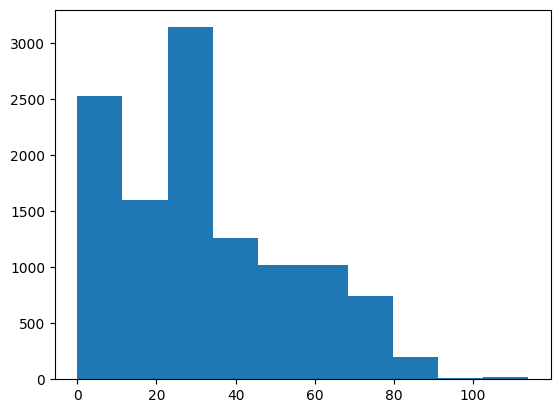

In [128]:
Sub_Fraud_data_complete_all.isna().sum()
plt.hist(Sub_Fraud_data_complete_all["Victim_Age"])
(Sub_Fraud_data_complete_all["Victim_Age"]==0).sum()
(Sub_Fraud_data_complete_all["Victim_Age"]==0).sum()

In [130]:
Sub_Fraud_data_complete_all_no_duplicates = Sub_Fraud_data_complete_all.drop_duplicates()
len(Sub_Fraud_data_complete_all_no_duplicates)

11028

In [131]:
Sub_Fraud_data_complete_all_no_duplicates.to_csv("Sub_Fraud_data_complete_all_no_duplicates.csv",index=False,encoding="utf-8-sig")

In [135]:
df_pivot = Sub_Fraud_data_complete_all_no_duplicates.pivot_table(index=['Area', 'Victim_Gender',  'Victim_Career', 'Victim_Age'],
                                 columns=["Fraud_type"],
                                 values="Platform",aggfunc='count').reset_index()

ind = df_pivot[df_pivot.columns[5:]].apply(sum,axis=1)!=0
df_pivot = df_pivot.loc[ind,:]
df_pivot = df_pivot.reset_index(drop=True)
cols_to_modify = df_pivot.columns[4:]
df_pivot[cols_to_modify] = df_pivot[cols_to_modify].applymap(lambda x: 1 if x > 1 else x)
df_pivot

<ipython-input-135-46bf02c921b9>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_pivot = Sub_Fraud_data_complete_all_no_duplicates.pivot_table(index=['Area', 'Victim_Gender',  'Victim_Career', 'Victim_Age'],
<ipython-input-135-46bf02c921b9>:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_pivot[cols_to_modify] = df_pivot[cols_to_modify].applymap(lambda x: 1 if x > 1 else x)


Fraud_type,Area,Victim_Gender,Victim_Career,Victim_Age,假中獎,假交友,假冒身分,假投資,假推銷,假檢警,假求職,假貸款,宗教詐騙,網購,繳費詐騙,色情應召,遊戲,釣魚簡訊,騙取金融帳戶
0,南投市,F,其他,31.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,南投市,M,其他,47.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,南投市,M,退休,68.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,南投市,M,退休,75.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,南投縣,F,其他,0.0,0,1,1,1,0,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3814,高雄市,M,退休,80.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3815,高雄市,M,退休,93.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3816,高雄市,M,金融業,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3817,高雄市,M,金融業,35.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report

# 產生隨機分類數據
X = pd.concat([pd.get_dummies(df_pivot[['Area','Victim_Gender','Victim_Career']]),df_pivot[['Victim_Age']] ],axis=1)
y = df_pivot[df_pivot.columns[4:]]

# 當 y_train 是一個 (樣本數, 類別數) 的 DataFrame，RandomForestClassifier 會自動視為「每一欄是一個獨立的二元分類問題」，也就是說：
# 你的模型 實際上訓練了 n_classes 個獨立的 RandomForestClassifier。
# 每個 RandomForestClassifier 負責預測一個類別是否為 1（屬於該類別）或 0（不屬於該類別）。
# 這個行為 等同於 MultiOutputClassifier(RandomForestClassifier())，因此你的 fit(X_train, y_train) 仍然能夠執行，且 predict(X_test) 仍然會輸出 One-Hot 格式的 y_pred。

# 切分訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# 建立 Random Forest 分類模型
rf_clf = RandomForestClassifier(n_estimators=3,min_samples_split=2)


# 訓練模型
rf_clf.fit(X_train, y_train)

# 預測
y_pred = rf_clf.predict(X_test)
y_pred_train = rf_clf.predict(X_train)

In [ ]:
# import lightgbm as lgb
# from sklearn.multioutput import MultiOutputRegressor
# from tqdm import tqdm
# LGBMClassifier_model = MultiOutputRegressor(lgb.LGBMClassifier(boosting_type='gbdt',
#                          # verbose = 0,
#                           num_leaves = 50,
#                           feature_fraction=0.8,
#                           bagging_fraction= 0.9,
#                          # bagging_freq= 8,
#                           # lambda_l1= 0.2,
#                           # lambda_l2= 0.2,
#                          learning_rate= 0.15,max_depth=10
#                          ), n_jobs=-1)

# LGBMClassifier_model.fit(X_train,y_train)

MultiOutputRegressor(estimator=LGBMClassifier(bagging_fraction=0.9,
                                              feature_fraction=0.8,
                                              learning_rate=0.15, max_depth=10,
                                              num_leaves=50),
                     n_jobs=-1)

In [ ]:
# # 預測
# y_pred = LGBMClassifier_model.predict(X_test)
# y_pred_train = LGBMClassifier_model.predict(X_train)

In [137]:
y_pred.sum(axis=1)
# y_test.sum(axis=1)

array([1, 1, 0, ..., 0, 1, 1])

In [138]:
X.columns
# {"Area":'高雄市',"Gender":"M","Career":"科技業","Age":39,"Platform":"通訊軟體"}

Index(['Area_南投市', 'Area_南投縣', 'Area_嘉義市', 'Area_嘉義縣', 'Area_基隆市', 'Area_宜蘭縣',
       'Area_屏東市', 'Area_屏東縣', 'Area_岡山縣', 'Area_彰化縣', 'Area_新北市', 'Area_新竹市',
       'Area_新竹縣', 'Area_桃園市', 'Area_澎湖縣', 'Area_臺中市', 'Area_臺北市', 'Area_臺南市',
       'Area_臺東市', 'Area_臺東縣', 'Area_臺灣', 'Area_花蓮縣', 'Area_苗栗市', 'Area_苗栗縣',
       'Area_金門縣', 'Area_雲林縣', 'Area_高雄市', 'Victim_Gender_F',
       'Victim_Gender_M', 'Victim_Gender_無', 'Victim_Career_上班族',
       'Victim_Career_保全', 'Victim_Career_公務員', 'Victim_Career_其他',
       'Victim_Career_司機', 'Victim_Career_娛樂/藝術', 'Victim_Career_媒體',
       'Victim_Career_學生', 'Victim_Career_家庭主婦', 'Victim_Career_工人',
       'Victim_Career_工程師', 'Victim_Career_技術工', 'Victim_Career_政治人物',
       'Victim_Career_教育', 'Victim_Career_會計', 'Victim_Career_服務業',
       'Victim_Career_業務', 'Victim_Career_法律', 'Victim_Career_無業',
       'Victim_Career_科技業', 'Victim_Career_自營商', 'Victim_Career_行政',
       'Victim_Career_設計/藝術', 'Victim_Career_警察', 'Victim_Career_軍人',
     

In [140]:
import pandas as pd
import numpy as np

# 假設欄位名稱如下
columns = ['Area_南投市', 'Area_南投縣', 'Area_嘉義市', 'Area_嘉義縣', 'Area_基隆市', 'Area_宜蘭縣',
       'Area_屏東市', 'Area_屏東縣', 'Area_岡山縣', 'Area_彰化縣', 'Area_新北市', 'Area_新竹市',
       'Area_新竹縣', 'Area_桃園市', 'Area_澎湖縣', 'Area_臺中市', 'Area_臺北市', 'Area_臺南市',
       'Area_臺東市', 'Area_臺東縣', 'Area_臺灣', 'Area_花蓮縣', 'Area_苗栗市', 'Area_苗栗縣',
       'Area_金門縣', 'Area_雲林縣', 'Area_高雄市', 'Victim_Gender_F',
       'Victim_Gender_M', 'Victim_Gender_無', 'Victim_Career_上班族',
       'Victim_Career_保全', 'Victim_Career_公務員', 'Victim_Career_其他',
       'Victim_Career_司機', 'Victim_Career_娛樂/藝術', 'Victim_Career_媒體',
       'Victim_Career_學生', 'Victim_Career_家庭主婦', 'Victim_Career_工人',
       'Victim_Career_工程師', 'Victim_Career_技術工', 'Victim_Career_政治人物',
       'Victim_Career_教育', 'Victim_Career_會計', 'Victim_Career_服務業',
       'Victim_Career_業務', 'Victim_Career_法律', 'Victim_Career_無業',
       'Victim_Career_科技業', 'Victim_Career_自營商', 'Victim_Career_行政',
       'Victim_Career_設計/藝術', 'Victim_Career_警察', 'Victim_Career_軍人',
       'Victim_Career_退休', 'Victim_Career_醫療', 'Victim_Career_金融業',
       'Victim_Age']

# 你的輸入資料
input_data = {"Area":'臺北市',"Gender":"F","Career":"學生","Age":15}

# 初始化一個零值的 DataFrame
data = np.zeros(len(columns), dtype=int)

# 將資料轉換為對應的欄位索引並賦值為 1
area_column = f"Area_{input_data['Area']}"
gender_column = f"Victim_Gender_{input_data['Gender']}"
career_column = f"Victim_Career_{input_data['Career']}"
age_column = f"Victim_Age"
# platform_column = f"Platform_{input_data['Platform']}"

# 找出對應欄位的索引
area_idx = columns.index(area_column)
gender_idx = columns.index(gender_column)
career_idx = columns.index(career_column)
age_idx = columns.index(age_column)
# platform_idx = columns.index(platform_column)

# 設定對應欄位的值為 1
data[area_idx] = 1
data[gender_idx] = 1
data[career_idx] = 1
# data[platform_idx] = 1
data[age_idx] = input_data["Age"]

# age_column = "Victim_Age_"
# if age_column in columns:
#     age_idx = columns.index(age_column)
#     data[age_idx] = 1

# 轉換為 DataFrame
df_result = pd.DataFrame([data], columns=columns)
print(df_result)

rf_clf.predict(df_result)[0]
type_index = np.where(rf_clf.predict(df_result)[0]>=1)
type_index = type_index[0].tolist()
type_index
df_pivot.columns[4:][type_index]


   Area_南投市  Area_南投縣  Area_嘉義市  Area_嘉義縣  Area_基隆市  Area_宜蘭縣  Area_屏東市  \
0         0         0         0         0         0         0         0   

   Area_屏東縣  Area_岡山縣  Area_彰化縣  ...  Victim_Career_科技業  Victim_Career_自營商  \
0         0         0         0  ...                  0                  0   

   Victim_Career_行政  Victim_Career_設計/藝術  Victim_Career_警察  Victim_Career_軍人  \
0                 0                    0                 0                 0   

   Victim_Career_退休  Victim_Career_醫療  Victim_Career_金融業  Victim_Age  
0                 0                 0                  0          15  

[1 rows x 59 columns]


Index(['假中獎', '假求職', '網購'], dtype='object', name='Fraud_type')

In [141]:
result = np.sum(y_pred, axis=1)
result

array([1, 1, 0, ..., 0, 1, 1])

In [142]:
# coding: utf-8
from typing import List
import numpy as np
def partial_correct_accuracy(y_true: List[int],y_pred: List[int],) -> float:
    count = 0
    for i in range(len(y_true)):
        p = sum(np.logical_and(y_true[i], y_pred[i]))
        q = sum(np.logical_or(y_true[i], y_pred[i]))
        count += p / q
    return round(count / len(y_true),2)
print("訓練集 accuracy: ", partial_correct_accuracy(np.array(y_train).tolist(), y_pred_train.tolist()))
print("測試集 accuracy: ", partial_correct_accuracy(np.array(y_test).tolist(), y_pred.tolist()))

訓練集 accuracy:  0.81
測試集 accuracy:  0.22


In [143]:
# coding: utf-8
from typing import List

import numpy as np
from sklearn import metrics


def partial_correct_precision(
    y_true: List[int],
    y_pred: List[int],
) -> float:

    count = 0

    for i in range(len(y_true)):
        if sum(y_pred[i]) == 0:
            continue

        p = sum(np.logical_and(y_true[i], y_pred[i]))
        q = sum(y_pred[i])

        count += p / q

    return count / len(y_true)



print("precision:", partial_correct_precision(np.array(y_test).tolist(), y_pred.tolist()))
# print("scikit-learn precision:", metrics.precision_score(np.array(y_test).tolist(), y_pred, average="samples"))




precision: 0.31725052628193984


In [144]:
# 評估準確率
accuracy = accuracy_score(y_test, y_pred)
print(f"分類模型準確率: {accuracy:.2f}")

# # 顯示詳細評估報告
# print(classification_report(y_test, y_pred))

分類模型準確率: 0.10


In [145]:
accuracy = accuracy_score(y_train, y_pred_train)
print(f"分類模型準確率: {accuracy:.2f}")

分類模型準確率: 0.76


In [146]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average="micro")  # 可用 "macro", "weighted"
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.3420


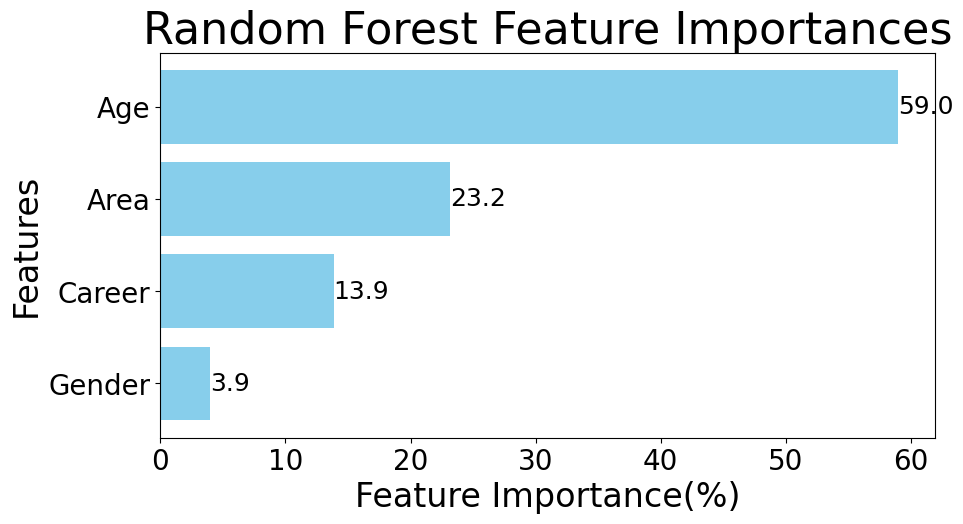

In [150]:
# # 繪製特徵重要性
# importances = rf_clf.feature_importances_
# feature_names = [f"Feature {i}" for i in range(X.shape[1])]

# plt.figure(figsize=(10, 5))
# plt.barh(feature_names, importances, color="skyblue")
# plt.xlabel("Feature Importance")
# plt.ylabel("Features")
# plt.title("Random Forest 特徵重要性")
# plt.show()


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 獲取特徵重要性
importances = rf_clf.feature_importances_
feature_names = X.columns  # X 是 Pandas DataFrame，包含 One-Hot 特徵名稱
feature_names
# 合併 One-Hot 特徵的重要性
feature_groups = {}
for name, importance in zip(feature_names, importances):
  if name[0:4] != "Area":
    base_name = name.split("_")[1] # 提取原始類別變數名稱
    feature_groups[base_name] = feature_groups.get(base_name, 0) + importance
  else:
    base_name = name.split("_")[0] # 提取原始類別變數名稱
    feature_groups[base_name] = feature_groups.get(base_name, 0) + importance

# 轉換為 DataFrame 並排序
df_importance = pd.DataFrame(list(feature_groups.items()), columns=["Feature", "Importance"])
df_importance = df_importance.sort_values(by="Importance", ascending=False)


# 繪製合併後的特徵重要性
plt.figure(figsize=(10, 5))
bars = plt.barh(df_importance["Feature"], df_importance["Importance"]*100, color="skyblue")
plt.xlabel("Feature Importance(%)",fontsize=24)
plt.ylabel("Features",fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Random Forest Feature Importances",fontsize=32)
plt.gca().invert_yaxis()
# 在每個長條上加上數字標籤
for bar in bars:
    plt.text(
        bar.get_width(),              # x 位置
        bar.get_y() + bar.get_height()/2,  # y 位置 (置中)
        f"{bar.get_width():.1f}",     # 顯示的數值 (四捨五入到小數第4位)
        va="center",                  # 垂直置中
        ha="left",                     # 靠左對齊
        fontsize=18,                   # 文字大小
        color="black"                  # 文字顏色
    )

plt.show()


In [ ]:
import joblib


# 保存模型
joblib.dump(rf_clf, 'random_forest_model.pkl')
print("模型已成功保存！")

模型已成功保存！


In [ ]:
rf_clf_load = joblib.load('random_forest_model.pkl')